In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rc('font',family='NanumGothicCoding')
matplotlib.rc('axes',unicode_minus=False)
%matplotlib inline

In [3]:
Broad = pd.read_csv("/home/piai/다운로드/Broadcasting.csv",encoding = "utf-8")
Crew = pd.read_csv("/home/piai/다운로드/Crew_group.csv",encoding = "utf-8")
Product = pd.read_csv("/home/piai/다운로드/Product.csv",encoding = "utf-8")

In [4]:
Broad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26283 entries, 0 to 26282
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   방송Code      26283 non-null  float64
 1   소요분         26283 non-null  float64
 2   가중분         26283 non-null  float64
 3   방송구분        26283 non-null  object 
 4   프로그램명       26283 non-null  object 
 5   상품ID        26283 non-null  int64  
 6   상품명         26283 non-null  object 
 7   매입과세구분      26283 non-null  object 
 8   상품목표취급금액    26283 non-null  int64  
 9   상품목표주문금액    26283 non-null  int64  
 10  상품목표공헌이익금액  26283 non-null  int64  
 11  판매단가        26283 non-null  int64  
 12  수수료율        26283 non-null  float64
 13  상품주문수량      26283 non-null  int64  
 14  상품주문금액      26283 non-null  int64  
 15  상품취소수량      26283 non-null  int64  
 16  상품취소금액      26283 non-null  int64  
 17  상품순주문수량     26283 non-null  int64  
 18  상품순주문금액     26283 non-null  int64  
 19  상품예상취급금액    26283 non-nul

In [5]:
Crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26283 entries, 0 to 26282
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   방송Code  26283 non-null  int64 
 1   방송구분    26283 non-null  object
 2   프로그램명   26283 non-null  object
 3   PD      18691 non-null  object
 4   SH      18510 non-null  object
 5   TD      18534 non-null  object
 6   상품ID    26283 non-null  int64 
 7   MD담당자명  26283 non-null  object
 8   부서코드    26283 non-null  int64 
 9   부서명     26283 non-null  object
 10  협력사ID   26283 non-null  int64 
 11  협력사명    26283 non-null  object
dtypes: int64(4), object(8)
memory usage: 2.4+ MB


In [6]:
Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품ID    6816 non-null   int64 
 1   상품명     6816 non-null   object
 2   브랜드ID   6816 non-null   int64 
 3   브랜드명    6816 non-null   object
 4   매입과세구분  6816 non-null   object
 5   대분류     6816 non-null   object
 6   중분류     6816 non-null   object
 7   소분류     6816 non-null   object
 8   세분류     6816 non-null   object
 9   카테고리    6816 non-null   object
 10  협력사ID   6816 non-null   int64 
 11  협력사명    6816 non-null   object
 12  매입형태    6816 non-null   object
 13  배송방식    6816 non-null   object
 14  판매단가    6816 non-null   int64 
dtypes: int64(4), object(11)
memory usage: 798.9+ KB


In [7]:
Broad['상품순주문수량'].describe()

count    26283.000000
mean       908.974775
std       1084.111832
min          0.000000
25%         76.000000
50%        499.000000
75%       1395.500000
max      11747.000000
Name: 상품순주문수량, dtype: float64

In [8]:
Product.drop_duplicates()

,상품ID,상품명,브랜드ID,브랜드명,매입과세구분,대분류,중분류,소분류,세분류,카테고리,협력사ID,협력사명,매입형태,배송방식,판매단가
0,10010984,완도 생매생이 35팩_3,21572,매생이(청삼대),면세,식품,수산물,건어물,김/미역/다시마,신선수산,100067,주식회사 뮤도파,위탁매입,협력사배송,40900
1,10011287,제조상궁 국내산 메주 담금 세트,21602,제조상궁메주담금세트,면세,식품,농산물,기타,기타,신선농산,100002,산협경제지주㈜,위탁매입,직택배,69900
2,10011746,프리미엄 제주은갈치300gx6미_2,21481,은갈치(제주SF),면세,식품,수산물,일반어류,갈치,신선수산,100004,물산업협동조합중앙회,위탁매입,직택배,68900
3,10012135,가포 멀티5 마사지기 풀세트,21264,가포멀티5,과세,건강,의료기기,의료용픔,공기압마사지기,레포츠기기,101032,(주)규포넷,위탁매입,협력사배송,198000
4,10013259,맷돌로갈아만든검은콩두유(185ml×105팩)_3,20852,맷돌두유,과세,식품,가공식품,유제품,두유,가공농산,100875,(주)마나스코리아,위탁매입,협력사배송,59900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,11179512,■연말특가■제우스커브드 UHD TV 65형,42184,제우스커브드TV2019,과세,가전,영상가전,TV,스마트 TV,가전,100716,(주)라이온그룹코리아,위탁매입,협력사배송,649000
6812,11179513,[데이스포] 밀크패드 1세트100p,44635,데이스포배변패드,과세,생활용품,일용잡화,포장류,기타,생활용품,100003,(주)산업기업유통센터,위탁매입,협력사배송,19000
6813,11179514,2021 제우스 UHD TV 75형,42174,제우스TV2019,과세,가전,영상가전,TV,스마트 TV,가전,100716,(주)라이온그룹코리아,위탁매입,협력사배송,1289000
6814,11179873,(직택배)[단품]100% 한우사골_3,44508,한우사골,면세,식품,축산물,한우,한우사골,신선축산,100067,주식회사 뮤도파,위탁매입,직택배,30900


In [9]:
Broad['방송Code']=Crew['방송Code']

In [10]:
Crew['방송Code'].value_counts()

1010036178        1
10221751721178    1
10401752720852    1
10421752626685    1
11791752542390    1
                 ..
1007875937614     1
1040875820851     1
1186875740642     1
1021875621066     1
10422628241399    1
Name: 방송Code, Length: 26283, dtype: int64

In [11]:
Broad.drop(Broad[Broad['상품예상취급금액']==0].index,inplace=True)

In [12]:
Broad[Broad['상품순주문수량']==0]

,방송Code,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,상품취소금액,상품순주문수량,상품순주문금액,상품예상취급금액,ARS금액,매입형태,배송방식,상품방송순번,방송시작시간,방송종료시간
47,10194726517,60.0,12.6,재방송,재방_건강식품,10093138,편백 숲 장성 생물 굼벵이 1kg_3,면세,7876388,10229076,...,256000,0,0,197120,1000,위탁매입,협력사배송,2,2020-01-04T03:55,2020-01-04T04:55
130,101013024611,65.0,117.7,생방송,의류,10247375,[단품] 미넴옴므 허리밴드 기모 정장팬츠,과세,0,0,...,139328,0,0,100860,0,위탁매입,협력사배송,3,2020-01-06T22:40,2020-01-06T23:45
153,101315336152,60.0,78.8,생방송,잡화,10247544,[ADRIENNE VITTADINI]리얼 카이만 명함지갑,과세,0,0,...,116364,0,0,72146,0,위탁매입,협력사배송,4,2020-01-06T09:25,2020-01-06T10:25
489,101948936502,60.0,77.4,생방송,건강식품,10401879,[풍기인삼농협]홍삼정원데이스틱(10ml*30포),과세,48239676,62648929,...,44455,0,0,34230,0,위탁매입,협력사배송,2,2020-01-15T06:50,2020-01-15T07:50
617,100561736515,75.0,91.0,생방송,주방용품,10402608,[단품] PN풍년메가IH28cm프라이팬,과세,0,0,...,69091,0,0,55273,0,위탁매입,협력사배송,2,2020-01-18T10:25,2020-01-18T11:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25654,10072565444433,65.0,108.9,생방송,인테리어,11118773,★2021최신상_[금성침대]리프레쉬 유로탑메트리스 Q,과세,0,0,...,390000,0,0,253500,0,위탁매입,협력사배송,5,2021-10-29T20:55,2021-10-29T22:00
25656,10072565644433,65.0,108.9,생방송,인테리어,11119266,★2021최신상_[금성침대]큐브협탁,과세,0,0,...,234546,0,0,152455,0,위탁매입,협력사배송,7,2021-10-29T20:55,2021-10-29T22:00
26073,10072607341272,60.0,96.5,생방송,인테리어,11080923,[보루네오]브루노 스툴,과세,0,0,...,326364,0,0,228455,0,위탁매입,협력사배송,4,2021-11-08T21:45,2021-11-08T22:45
26131,10052613144788,50.0,14.2,재방송,재방_주방용품,11168629,[단품] 도무스 보온보냉병 1200ml,과세,432890,577187,...,45273,0,0,33955,0,위탁매입,협력사배송,2,2021-11-09T04:50,2021-11-09T05:40


In [13]:
BC=Broad[['방송Code','상품순주문수량','방송시작시간','ARS금액','가중분','소요분','판매단가']].merge(Crew,on='방송Code')
BC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24873 entries, 0 to 24872
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   방송Code   24873 non-null  int64  
 1   상품순주문수량  24873 non-null  int64  
 2   방송시작시간   24873 non-null  object 
 3   ARS금액    24873 non-null  int64  
 4   가중분      24873 non-null  float64
 5   소요분      24873 non-null  float64
 6   판매단가     24873 non-null  int64  
 7   방송구분     24873 non-null  object 
 8   프로그램명    24873 non-null  object 
 9   PD       17705 non-null  object 
 10  SH       17528 non-null  object 
 11  TD       17548 non-null  object 
 12  상품ID     24873 non-null  int64  
 13  MD담당자명   24873 non-null  object 
 14  부서코드     24873 non-null  int64  
 15  부서명      24873 non-null  object 
 16  협력사ID    24873 non-null  int64  
 17  협력사명     24873 non-null  object 
dtypes: float64(2), int64(7), object(9)
memory usage: 3.6+ MB


In [14]:
Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품ID    6816 non-null   int64 
 1   상품명     6816 non-null   object
 2   브랜드ID   6816 non-null   int64 
 3   브랜드명    6816 non-null   object
 4   매입과세구분  6816 non-null   object
 5   대분류     6816 non-null   object
 6   중분류     6816 non-null   object
 7   소분류     6816 non-null   object
 8   세분류     6816 non-null   object
 9   카테고리    6816 non-null   object
 10  협력사ID   6816 non-null   int64 
 11  협력사명    6816 non-null   object
 12  매입형태    6816 non-null   object
 13  배송방식    6816 non-null   object
 14  판매단가    6816 non-null   int64 
dtypes: int64(4), object(11)
memory usage: 798.9+ KB


In [15]:
Cate=Product[['상품ID','카테고리']]

In [16]:
BCC=BC.merge(Cate,left_on='상품ID',right_on='상품ID',how='left')
BCC.head(30)

,방송Code,상품순주문수량,방송시작시간,ARS금액,가중분,소요분,판매단가,방송구분,프로그램명,PD,SH,TD,상품ID,MD담당자명,부서코드,부서명,협력사ID,협력사명,카테고리
0,1010036178,575,2020-01-03T00:10,1000,52.7,50.0,149000,녹화방송,재방_의류,NaN,NaN,NaN,10242138,최승미,3111205,생활2팀,104532,(주)턱케이앤코,의류
1,1019126356,184,2020-01-03T01:00,1000,38.1,60.0,179000,녹화방송,재방_건강식품,NaN,NaN,NaN,10092003,"심인혜,박만이건",3121405,식품4팀,100002,산협경제지주㈜,건강식품
2,1040336520,435,2020-01-03T02:00,1000,19.7,60.0,48900,재방송,재방_가공농산,NaN,NaN,NaN,10295865,"최병규,최만훈",3121105,식품1팀,104640,(주)하일에프앤씨,가공농산
3,1021427468,120,2020-01-03T03:00,1000,16.1,60.0,49900,재방송,재방_신선수산,NaN,NaN,NaN,10113666,신대혁,3121305,식품3팀,100004,물산업협동조합중앙회,신선수산
4,1019520130,117,2020-01-03T04:00,1000,15.1,60.0,176000,재방송,재방_건강식품,NaN,NaN,NaN,10112103,심인혜,3121405,식품4팀,100002,산협경제지주㈜,건강식품
5,1019620130,57,2020-01-03T04:00,1000,15.1,60.0,129000,재방송,재방_건강식품,NaN,NaN,NaN,10112105,심인혜,3121405,식품4팀,100002,산협경제지주㈜,건강식품
6,1020721688,139,2020-01-03T05:00,1000,24.0,60.0,69900,녹화방송,재방_건강식품,NaN,NaN,NaN,10074959,박만이건,3121405,식품4팀,101030,(주)필스빌,건강식품
7,1020821688,126,2020-01-03T05:00,1000,24.0,60.0,119800,녹화방송,재방_건강식품,NaN,NaN,NaN,10079429,박만이건,3121405,식품4팀,101030,(주)필스빌,건강식품
8,1010924189,1171,2020-01-03T06:00,1000,69.5,75.0,69000,녹화방송,재방_의류,NaN,NaN,NaN,10060369,최유만,3111205,생활2팀,100641,(주)패옹킴,의류
9,10151024073,96,2020-01-03T07:15,1000,72.8,60.0,3330000,생방송,잡화,강주우,최육영,우이혁,10410661,최주나,3111305,생활3팀,102636,(주)유스다이아몬드,잡화


In [17]:
BCC[BCC['상품순주문수량']==0]

,방송Code,상품순주문수량,방송시작시간,ARS금액,가중분,소요분,판매단가,방송구분,프로그램명,PD,SH,TD,상품ID,MD담당자명,부서코드,부서명,협력사ID,협력사명,카테고리
43,10194726517,0,2020-01-04T03:55,1000,12.6,60.0,129000,재방송,재방_건강식품,NaN,NaN,NaN,10093138,"심인혜,박만이건",3121405,식품4팀,103642,산업회사법익스주식회사대정,건강식품
109,101013024611,0,2020-01-06T22:40,0,117.7,65.0,79000,생방송,의류,강승필,"송승환,이유경",최백장,10247375,최승미,3111205,생활2팀,101093,주식회사 다이아물산,의류
125,101315336152,0,2020-01-06T09:25,0,78.8,60.0,128000,생방송,잡화,이혁애,"최육영,박서희",이만혁,10247544,"전승아,전승아",3111305,생활3팀,104421,주식회사 라쎄,잡화
428,101948936502,0,2020-01-15T06:50,0,77.4,60.0,48900,생방송,건강식품,박소흥,"박원이,안덕혁",이인호,10401879,심인혜,3121405,식품4팀,100002,산협경제지주㈜,건강식품
549,100561736515,0,2020-01-18T10:25,0,91.0,75.0,76000,생방송,주방용품,이효경,박주혁B,이만혁,10402608,"이서소,유다솜",3111105,생활1팀,101399,주식회사PN풍년,주방용품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24583,10072565444433,0,2021-10-29T20:55,0,108.9,65.0,429000,생방송,인테리어,강인택,"박상언,최은경",윤주혁,11118773,"전상운,박경은",3111105,생활1팀,100610,주식회사각성침대,인테리어
24584,10072565644433,0,2021-10-29T20:55,0,108.9,65.0,129000,생방송,인테리어,강인택,"박상언,최은경",윤주혁,11119266,"전상운,박경은",3111105,생활1팀,100610,주식회사각성침대,인테리어
24990,10072607341272,0,2021-11-08T21:45,0,96.5,60.0,359000,생방송,인테리어,이호만,"박상언,이조헌",이인호,11080923,"전상운,박경은",3111105,생활1팀,102199,(주)쉐쥬드규구,인테리어
25046,10052613144788,0,2021-11-09T04:50,0,14.2,50.0,49800,재방송,재방_주방용품,NaN,NaN,NaN,11168629,"이서소,유다솜",3111105,생활1팀,107519,워너비엠 (주),주방용품


In [18]:
#상품순주문수량이 결측인 데이터행 삭제
BCC[BCC['상품순주문수량']==0].index

Int64Index([   43,   109,   125,   428,   549,   818,   896,   933,  1071,
             1133,
            ...
            23783, 24023, 24190, 24221, 24238, 24583, 24584, 24990, 25046,
            25124],
           dtype='int64', length=123)

In [19]:
BCC.drop(BCC[BCC['상품순주문수량']==0].index,axis = 0,inplace=True)

In [20]:
BCC[BCC['상품순주문수량']==0].count()

방송Code     0
상품순주문수량    0
방송시작시간     0
ARS금액      0
가중분        0
소요분        0
판매단가       0
방송구분       0
프로그램명      0
PD         0
SH         0
TD         0
상품ID       0
MD담당자명     0
부서코드       0
부서명        0
협력사ID      0
협력사명       0
카테고리       0
dtype: int64

In [21]:
BCC['상품순주문수량'].describe()

count    25072.000000
mean       956.787691
std       1091.278726
min          1.000000
25%        117.000000
50%        563.000000
75%       1459.000000
max      11747.000000
Name: 상품순주문수량, dtype: float64

In [22]:
BCC['시간대']=BCC['방송시작시간'].apply( lambda x : str(x)[-5:-3])


In [23]:
BCC['카테고리'].value_counts()

의류        2400
신선농산      2322
생활용품      1921
건강식품      1915
침구        1616
신선수산      1605
잡화        1542
인테리어      1452
가공농산      1371
가공축산      1216
가전        1019
가공수산       944
보석         884
주방용품       878
이미용        855
상생_식품      529
레포츠기기      500
언더웨어       499
신선축산       463
문화서비스      445
상생_공산품     356
레포츠의류      240
상조          99
이미용_기타       1
Name: 카테고리, dtype: int64

In [24]:
BCC['ARS금액'].value_counts()

1000     20551
0         2654
3000       450
5000       307
10000      235
         ...  
3450         1
18800        1
5590         1
4140         1
14800        1
Name: ARS금액, Length: 90, dtype: int64

In [25]:
BCC[BCC['카테고리']=='이미용_기타'].index

Int64Index([22319], dtype='int64')

In [26]:
BCC['카테고리'].loc[BCC[BCC['카테고리']=='이미용_기타'].index]='이미용'

/tmp/ipykernel_24887/1268407883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BCC['카테고리'].loc[BCC[BCC['카테고리']=='이미용_기타'].index]='이미용'


In [27]:
#요일 변수 추가
BCC['방송시작시간'] = pd.to_datetime(BCC['방송시작시간'])

# "weekday" 열 추가
BCC['방송요일'] = BCC['방송시작시간'].dt.day_name()

# 월추가
BCC['방송시작시간']
BCC['방송월']=BCC['방송시작시간'].dt.month.astype(object)
BCC['방송월']

#분기추가
BCC['방송분기']=BCC['방송시작시간'].dt.quarter.astype(object)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from xgboost import plot_importance
from lightgbm import LGBMRegressor
from lightgbm import plot_importance

In [29]:
#평가함수 불러오기
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [30]:
#평가함수정의

def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
def mean_absolute_percentage_error(y_true,y_pred):
    return np.sqrt(mean_absolute_error(y_true,y_pred))


In [31]:
BCC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25072 entries, 0 to 25194
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   방송Code   25072 non-null  int64         
 1   상품순주문수량  25072 non-null  int64         
 2   방송시작시간   25072 non-null  datetime64[ns]
 3   ARS금액    25072 non-null  int64         
 4   가중분      25072 non-null  float64       
 5   소요분      25072 non-null  float64       
 6   판매단가     25072 non-null  int64         
 7   방송구분     25072 non-null  object        
 8   프로그램명    25072 non-null  object        
 9   PD       17883 non-null  object        
 10  SH       17707 non-null  object        
 11  TD       17726 non-null  object        
 12  상품ID     25072 non-null  int64         
 13  MD담당자명   25072 non-null  object        
 14  부서코드     25072 non-null  int64         
 15  부서명      25072 non-null  object        
 16  협력사ID    25072 non-null  int64         
 17  협력사명     25072 non-null  object

In [32]:
BCC_dummy=pd.get_dummies(BCC[['ARS금액','판매단가','시간대','카테고리','방송구분','방송요일','방송월']])
BCC_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25072 entries, 0 to 25194
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ARS금액           25072 non-null  int64
 1   판매단가            25072 non-null  int64
 2   시간대_00          25072 non-null  uint8
 3   시간대_01          25072 non-null  uint8
 4   시간대_02          25072 non-null  uint8
 5   시간대_03          25072 non-null  uint8
 6   시간대_04          25072 non-null  uint8
 7   시간대_05          25072 non-null  uint8
 8   시간대_06          25072 non-null  uint8
 9   시간대_07          25072 non-null  uint8
 10  시간대_08          25072 non-null  uint8
 11  시간대_09          25072 non-null  uint8
 12  시간대_10          25072 non-null  uint8
 13  시간대_11          25072 non-null  uint8
 14  시간대_12          25072 non-null  uint8
 15  시간대_13          25072 non-null  uint8
 16  시간대_14          25072 non-null  uint8
 17  시간대_15          25072 non-null  uint8
 18  시간대_16          25072 non-

/home/piai/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [33]:
scaler = StandardScaler()

BCC_s=scaler.fit_transform(BCC[['ARS금액','판매단가']])

BCC_dummy[['ARS금액','판매단가']]=BCC_s
BCC_dummy[['ARS금액','판매단가']]
BCC_dummy

,ARS금액,판매단가,시간대_00,시간대_01,시간대_02,시간대_03,시간대_04,시간대_05,시간대_06,시간대_07,...,방송월_3,방송월_4,방송월_5,방송월_6,방송월_7,방송월_8,방송월_9,방송월_10,방송월_11,방송월_12
0,-0.151255,-0.149952,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.151255,-0.095999,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.151255,-0.329976,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.151255,-0.328177,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.151255,-0.101394,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25190,-0.151255,0.749268,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25191,-0.151255,1.900270,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25192,-0.151255,0.389580,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25193,-0.151255,-0.131967,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(BCC_dummy,BCC['상품순주문수량'],test_size = 0.2)

In [89]:
estimator = DecisionTreeRegressor()

para_depth=[n_depth for n_depth in range(1,11)]
para_split=[i*2 for i in range(1,11)]
para_leaf=[i for i in range(1,21)]

para_grid={"max_depth":para_depth,"min_samples_split":para_split, "min_samples_leaf":para_leaf}
grid_dt=GridSearchCV(estimator,para_grid,scoring='r2',n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best model: \n{}".format(grid_dt.best_estimator_))
print("\nbest prameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best model: 
DecisionTreeRegressor(max_depth=10, min_samples_leaf=13)

best prameter: 
{'max_depth': 10, 'min_samples_leaf': 13, 'min_samples_split': 2}

best score: 
0.583


In [90]:
#랜덤포레스트
estimator = RandomForestRegressor()


para_depth=[n_depth for n_depth in range(1,11)]
para_split=[i*2 for i in range(1,11)]
para_leaf=[i for i in range(1,21)]

para_grid={"max_depth":para_depth}
grid_rf=GridSearchCV(estimator,para_grid,scoring='r2',n_jobs=-1)
grid_rf.fit(df_train_x,df_train_y)

print("best model: \n{}".format(grid_rf.best_estimator_))
print("\nbest prameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best model: 
RandomForestRegressor(max_depth=10)

best prameter: 
{'max_depth': 10}

best score: 
0.612


In [91]:
para_grid={"max_depth":[10],"min_samples_split":para_split, "min_samples_leaf":para_leaf}
grid_rf=GridSearchCV(estimator,para_grid,scoring='r2',n_jobs=-1)
grid_rf.fit(df_train_x,df_train_y)

print("best model: \n{}".format(grid_rf.best_estimator_))
print("\nbest prameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best model: 
RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=12)

best prameter: 
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 12}

best score: 
0.615


In [93]:

#그래디언트 부스팅
estimator = GradientBoostingRegressor()

para_lr = [lr*0.02 for lr in range(1,16)]
para_depth=[n_depth for n_depth in range(1,11)]
para_split=[i*2 for i in range(1,11)]



In [94]:
para_grid={"learning_rate":para_lr}
grid_gb=GridSearchCV(estimator,para_grid,scoring='r2',n_jobs=-1)
grid_gb.fit(df_train_x,df_train_y)
print("best model: \n{}".format(grid_gb.best_estimator_))
print("\nbest prameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best model: 
GradientBoostingRegressor(learning_rate=0.3)

best prameter: 
{'learning_rate': 0.3}

best score: 
0.655


In [95]:

para_ntree=[n_tree*80 for n_tree in range(1,6)]

para_grid={"learning_rate":para_lr,'n_estimators':para_ntree}
grid_gb=GridSearchCV(estimator,para_grid,scoring='r2',n_jobs=-1)
grid_gb.fit(df_train_x,df_train_y)
print("best model: \n{}".format(grid_gb.best_estimator_))
print("\nbest prameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best model: 
GradientBoostingRegressor(learning_rate=0.3, n_estimators=400)

best prameter: 
{'learning_rate': 0.3, 'n_estimators': 400}

best score: 
0.691


In [96]:
#그래디언트 부스팅


para_grid={"max_depth":para_depth,"learning_rate":[0.3],'n_estimators':[400]}
grid_gb=GridSearchCV(estimator,para_grid,scoring='r2',n_jobs=-1)
grid_gb.fit(df_train_x,df_train_y)
print("best model: \n{}".format(grid_gb.best_estimator_))
print("\nbest prameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best model: 
GradientBoostingRegressor(learning_rate=0.3, max_depth=4, n_estimators=400)

best prameter: 
{'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 400}

best score: 
0.696


In [98]:
#그래디언트 부스팅


para_grid={"max_depth":[4], "min_samples_leaf":para_leaf,'n_estimators':[400],"learning_rate":[0.3]}
grid_gb=GridSearchCV(estimator,para_grid,scoring='r2',n_jobs=-1)
grid_gb.fit(df_train_x,df_train_y)


print("best model: \n{}".format(grid_gb.best_estimator_))
print("\nbest prameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best model: 
GradientBoostingRegressor(learning_rate=0.3, max_depth=4, min_samples_leaf=8,
                          n_estimators=400)

best prameter: 
{'learning_rate': 0.3, 'max_depth': 4, 'min_samples_leaf': 8, 'n_estimators': 400}

best score: 
0.704


In [99]:
#그래디언트 부스팅

para_grid={"max_depth":[4], "min_samples_leaf":[8],'min_samples_split':para_split,'n_estimators':[400],"learning_rate":[0.3]}
grid_gb=GridSearchCV(estimator,para_grid,scoring='r2',n_jobs=-1)
grid_gb.fit(df_train_x,df_train_y)

print("best model: \n{}".format(grid_gb.best_estimator_))
print("\nbest prameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best model: 
GradientBoostingRegressor(learning_rate=0.3, max_depth=4, min_samples_leaf=8,
                          n_estimators=400)

best prameter: 
{'learning_rate': 0.3, 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 400}

best score: 
0.704


In [100]:

#xgb
estimator = XGBRegressor()

para_lr = [lr*0.01 for lr in range(1,31)]
para_depth=[n_depth for n_depth in range(1,11)]
para_split=[i*2 for i in range(1,11)]
para_leaf=[i for i in range(1,21)]
para_ntree=[n_tree*80 for n_tree in range(1,6)]

para_grid={"learning_rate":para_lr,'n_estimators':para_ntree}
grid_xgb=GridSearchCV(estimator,para_grid,scoring='r2',n_jobs=-1)
grid_xgb.fit(df_train_x,df_train_y)
print("best model: \n{}".format(grid_xgb.best_estimator_))
print("\nbest prameter: \n{}".format(grid_xgb.best_params_))
print("\nbest score: \n{}".format(grid_xgb.best_score_.round(3)))

best model: 
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.14, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=320, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

best prameter: 
{'learning_rate': 0.14, 'n_estimators': 320}

best score: 
0.707


In [101]:
#xgb

estimator = XGBRegressor()
para_grid={"max_depth":para_depth,"learning_rate":[0.14],'n_estimators':[320]}
grid_xgb=GridSearchCV(estimator,para_grid,scoring='r2',n_jobs=-1)
grid_xgb.fit(df_train_x,df_train_y)
print("best model: \n{}".format(grid_xgb.best_estimator_))
print("\nbest prameter: \n{}".format(grid_xgb.best_params_))
print("\nbest score: \n{}".format(grid_xgb.best_score_.round(3)))

best model: 
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.14, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=320, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

best prameter: 
{'learning_rate': 0.14, 'max_depth': 6, 'n_estimators': 320}

best score: 
0.707


In [102]:
# lightgbm
estimator = LGBMRegressor()
para_ntree=[n_tree*80 for n_tree in range(1,6)]
para_lr = [lr*0.01 for lr in range(1,31)]
para_depth=[n_depth for n_depth in range(1,11)]
para_split=[i*2 for i in range(1,11)]
para_leaf=[i for i in range(1,21)]

para_grid={'n_estimators':para_ntree,"learning_rate":para_lr}
grid_lgbm=GridSearchCV(estimator,para_grid,scoring='r2',n_jobs=-1)
grid_lgbm.fit(df_train_x,df_train_y)
print("best model: \n{}".format(grid_lgbm.best_estimator_))
print("\nbest prameter: \n{}".format(grid_lgbm.best_params_))
print("\nbest score: \n{}".format(grid_lgbm.best_score_.round(3)))

best model: 
LGBMRegressor(learning_rate=0.11, n_estimators=400)

best prameter: 
{'learning_rate': 0.11, 'n_estimators': 400}

best score: 
0.709


In [104]:
#lgbm
para_depth=[n_depth for n_depth in range(1,11)]
para_grid={"max_depth":para_depth,'n_estimators':[400],"learning_rate":[0.11]}
grid_lgbm=GridSearchCV(estimator,para_grid,scoring='r2',n_jobs=-1)
grid_lgbm.fit(df_train_x,df_train_y)
print("best model: \n{}".format(grid_lgbm.best_estimator_))
print("\nbest prameter: \n{}".format(grid_lgbm.best_params_))
print("\nbest score: \n{}".format(grid_lgbm.best_score_.round(3)))


best model: 
LGBMRegressor(learning_rate=0.11, max_depth=10, n_estimators=400)

best prameter: 
{'learning_rate': 0.11, 'max_depth': 10, 'n_estimators': 400}

best score: 
0.706


In [105]:

b

dt_model = DecisionTreeRegressor(min_samples_leaf=13,min_samples_split=2,max_depth=10)
dt_model.fit(df_train_x,df_train_y)

rf_model = RandomForestRegressor(min_samples_leaf=12,min_samples_split=2,max_depth=10)
rf_model.fit(df_train_x,df_train_y)

gb_model = GradientBoostingRegressor(min_samples_leaf=8,min_samples_split=2,max_depth=4,learning_rate=0.3,n_estimators= 400)
gb_model.fit(df_train_x,df_train_y)

xgb_model = XGBRegressor(max_depth=6,learning_rate=0.14,n_estimators = 320)
xgb_model.fit(df_train_x,df_train_y)

lgbm_model = LGBMRegressor(learning_rate = 0.11, n_estimators=400)
lgbm_model.fit(df_train_x,df_train_y)

LGBMRegressor(learning_rate=0.11, n_estimators=400)

In [126]:
dt_model.predict(df_test_x)[0:10]

array([1509.29731664,   11.1399177 ,  377.47      ,  244.6557377 ,
        195.84615385,  722.6318743 , 1094.92523364, 2064.2530836 ,
       1509.29731664,  172.32      ])

In [125]:
df_test_y.head(10)

14262    1780
9345       11
11172      90
21631     191
10927      83
10403    1493
19446     430
9239      380
14202    1433
4219      285
Name: 상품순주문수량, dtype: int64

In [41]:
from sklearn.metrics import r2_score

In [39]:
models = ["의사결정나무","랜덤포레스트","그래디언트 부스팅",'XGBOOST','LightGBM']
mse,rmse,mae,r2 = [],[],[],[]

In [137]:
dt_y_pred = dt_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
r2.append(r2_score(df_test_y,dt_y_pred))

In [138]:
rf_y_pred = rf_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
r2.append(r2_score(df_test_y,rf_y_pred))

In [139]:
gb_y_pred = gb_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
r2.append(r2_score(df_test_y,gb_y_pred))

In [140]:
xgb_y_pred = xgb_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y,xgb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,xgb_y_pred))
mae.append(mean_absolute_error(df_test_y,xgb_y_pred))
r2.append(r2_score(df_test_y,xgb_y_pred))

In [42]:
lgbm_y_pred = lgbm_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y,lgbm_y_pred))
rmse.append(root_mean_squared_error(df_test_y,lgbm_y_pred))
mae.append(mean_absolute_error(df_test_y,lgbm_y_pred))
r2.append(r2_score(df_test_y,lgbm_y_pred))

In [144]:
table=pd.DataFrame({'mse':mse,'rmse':rmse,'mae':mae,'r2':r2},index=models)
table

,mse,rmse,mae,r2
의사결정나무,527465.291667,726.268058,418.871022,0.567816
랜덤포레스트,499585.532374,706.813648,407.709464,0.590659
그래디언트 부스팅,365826.977817,604.836323,366.895100,0.700256
XGBOOST,362348.732824,601.954095,354.511678,0.703106
LightGBM,354289.998475,595.222646,350.301438,0.709709


In [43]:
r2

[0.718908230826717]

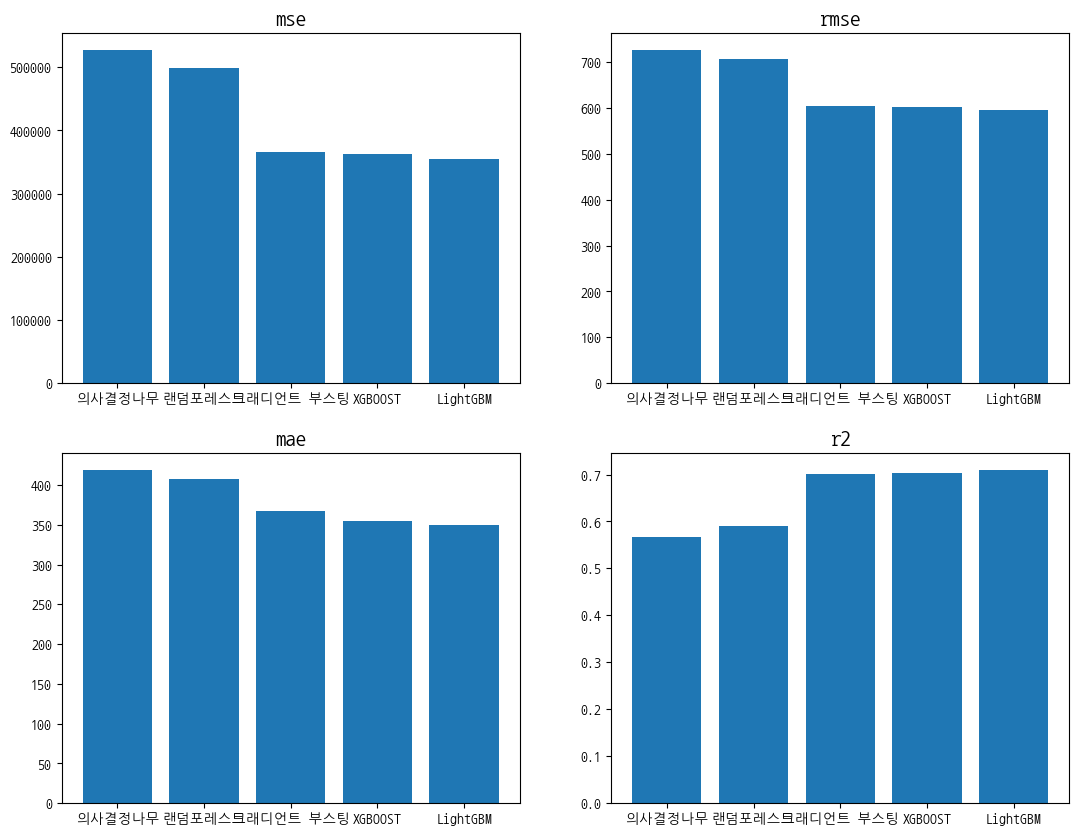

In [143]:
fig,ax=plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)
ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)
ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)
ax[1,1].bar(models,r2)
ax[1,1].set_title("r2").set_fontsize(15)

In [37]:
lgbm_model = LGBMRegressor(learning_rate = 0.11, n_estimators=400)
lgbm_model.fit(df_train_x,df_train_y)

LGBMRegressor(learning_rate=0.11, n_estimators=400)

ERROR: Could not find a version that satisfies the requirement jobilb (from versions: none)
ERROR: No matching distribution found for jobilb


In [ ]:
BCC_dummy=pd.get_dummies(BCC[['ARS금액','판매단가','시간대','카테고리','방송구분','방송요일','방송월']])

In [46]:
from sklearn.externals import jobilb

ImportError: cannot import name 'jobilb' from 'sklearn.externals' (/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/externals/__init__.py)

In [132]:
inputdata=[1000,59000,'09','의류','생방송','Friday',1]
inputdata2=[1000,49000,'18','신선농산','생방송','Sunday',6]
inputdata3=[2000,39000,'21','신선수산','생방송','Saturday',8]
inputdata4=[1000,49000,'16','가공축산','재방송','Monday',10]
inputdata5=[1000,129000,'12','건강식품','생방송','Sunday',3]

newdata=pd.DataFrame([inputdata,inputdata2,inputdata3,inputdata4,inputdata5],columns=['ARS금액','판매단가','시간대','카테고리','방송구분','방송요일','방송월'])
BCC2=BCC[['ARS금액','판매단가','시간대','카테고리','방송구분','방송요일','방송월']]
BCC2=pd.concat([BCC2,newdata])
print(BCC2.tail(5))


   ARS금액    판매단가 시간대  카테고리 방송구분      방송요일 방송월
0   1000   59000  09    의류  생방송    Friday   1
1   1000   49000  18  신선농산  생방송    Sunday   6
2   2000   39000  21  신선수산  생방송  Saturday   8
3   1000   49000  16  가공축산  재방송    Monday  10
4   1000  129000  12  건강식품  생방송    Sunday   3


In [133]:
BCC2_dummy=pd.get_dummies(BCC2)

/home/piai/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [114]:
BCC2_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25077 entries, 0 to 4
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ARS금액           25077 non-null  int64
 1   판매단가            25077 non-null  int64
 2   시간대_00          25077 non-null  uint8
 3   시간대_01          25077 non-null  uint8
 4   시간대_02          25077 non-null  uint8
 5   시간대_03          25077 non-null  uint8
 6   시간대_04          25077 non-null  uint8
 7   시간대_05          25077 non-null  uint8
 8   시간대_06          25077 non-null  uint8
 9   시간대_07          25077 non-null  uint8
 10  시간대_08          25077 non-null  uint8
 11  시간대_09          25077 non-null  uint8
 12  시간대_10          25077 non-null  uint8
 13  시간대_11          25077 non-null  uint8
 14  시간대_12          25077 non-null  uint8
 15  시간대_13          25077 non-null  uint8
 16  시간대_14          25077 non-null  uint8
 17  시간대_15          25077 non-null  uint8
 18  시간대_16          25077 non-null

In [115]:
BCC2_dummy.loc[len(BCC2),['ARS금액','판매단가']]

ARS금액     1000
판매단가     79900
Name: 25077, dtype: int64

In [134]:
scaler.transform(newdata.loc[0:5,['ARS금액','판매단가']])

array([[-0.15125549, -0.31181139],
       [-0.15125549, -0.32979579],
       [ 0.31853233, -0.34778019],
       [-0.15125549, -0.32979579],
       [-0.15125549, -0.18592061]])

In [135]:
BCC2_dummy[['ARS금액','판매단가']]=scaler.transform(BCC2_dummy[['ARS금액','판매단가']])

In [129]:
BCC2_dummy.tail(5)

,ARS금액,판매단가,시간대_00,시간대_01,시간대_02,시간대_03,시간대_04,시간대_05,시간대_06,시간대_07,...,방송월_3,방송월_4,방송월_5,방송월_6,방송월_7,방송월_8,방송월_9,방송월_10,방송월_11,방송월_12
0,-0.151255,-0.311811,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.621043,-0.329796,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.318532,-0.347780,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.151255,-0.329796,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.151255,-0.185921,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [136]:
lgbm_y_pred = lgbm_model.predict(BCC2_dummy)
lgbm_y_pred[-5:].round(0)

array([2320., 1194., 3703., 1129.,  606.])

['ARS금액','판매단가','시간대','카테고리','방송구분','방송요일','방송월']
inputdata=[1000,59000,'09','의류','생방송','Friday',1]
279.0

In [137]:
newdata

,ARS금액,판매단가,시간대,카테고리,방송구분,방송요일,방송월
0,1000,59000,09,의류,생방송,Friday,1
1,1000,49000,18,신선농산,생방송,Sunday,6
2,2000,39000,21,신선수산,생방송,Saturday,8
3,1000,49000,16,가공축산,재방송,Monday,10
4,1000,129000,12,건강식품,생방송,Sunday,3
